In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### 1. De una lista de deportes indicados en el archivo athlete_events.csv, liste todos los deportes que se han realizado en la historia de los juegos olímpicos en orden alfabético

In [3]:
deportes = np.sort(df['Sport'].unique())
deportes

array(['Aeronautics', 'Alpine Skiing', 'Alpinism', 'Archery',
       'Art Competitions', 'Athletics', 'Badminton', 'Baseball',
       'Basketball', 'Basque Pelota', 'Beach Volleyball', 'Biathlon',
       'Bobsleigh', 'Boxing', 'Canoeing', 'Cricket', 'Croquet',
       'Cross Country Skiing', 'Curling', 'Cycling', 'Diving',
       'Equestrianism', 'Fencing', 'Figure Skating', 'Football',
       'Freestyle Skiing', 'Golf', 'Gymnastics', 'Handball', 'Hockey',
       'Ice Hockey', 'Jeu De Paume', 'Judo', 'Lacrosse', 'Luge',
       'Military Ski Patrol', 'Modern Pentathlon', 'Motorboating',
       'Nordic Combined', 'Polo', 'Racquets', 'Rhythmic Gymnastics',
       'Roque', 'Rowing', 'Rugby', 'Rugby Sevens', 'Sailing', 'Shooting',
       'Short Track Speed Skating', 'Skeleton', 'Ski Jumping',
       'Snowboarding', 'Softball', 'Speed Skating', 'Swimming',
       'Synchronized Swimming', 'Table Tennis', 'Taekwondo', 'Tennis',
       'Trampolining', 'Triathlon', 'Tug-Of-War', 'Volleyball',
   

### 2. Implemente una función que solicite al usuario un deporte, y busque en la base de datos todos los años en que se ha realizado dicho deporte.

In [4]:
def año_deporte(deporte):
    df_sport = df[df['Sport'] == deporte]
    df_sport_year = np.sort(df_sport['Year'].unique())
    return df_sport_year

In [5]:
deporte = input('Ingrese un deporte: ')
df_sport = df[df['Sport'] == deporte]
df_sport_year = np.sort(df_sport['Year'].unique())
df_sport_year

array([1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1936, 1948, 1952,
       1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996,
       2000, 2004, 2008, 2012, 2016], dtype=int64)

In [6]:
deporte = input('Ingrese un deporte: ')
año_deporte(deporte)

array([1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1936, 1948, 1952,
       1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996,
       2000, 2004, 2008, 2012, 2016], dtype=int64)

### 3. Implemente una función que solicite al usuario un deporte, y busque en la base de datos el año con menor y mayor cantidad de atletas en dicho deporte.

In [7]:
deporte = input('Ingrese un deporte: ')
df_sport = df[df['Sport'] == deporte]
df_sport_players_year =  df_sport.groupby('Year').nunique()['Name'].reset_index()

df_sport_players_year_max = df_sport_players_year[['Name', 'Year']].max()

df_sport_players_year_min = df_sport_players_year[['Name', 'Year']].min()

""" print(deporte)
print(df_sport_players_year_max[0])
print(df_sport_players_year_max[1]) """

print(f'El {deporte} tuvo mayor cantidad de deportistas el año {df_sport_players_year_max[1]} con un total de {df_sport_players_year_max[0]}.')
print(f'El {deporte} tuvo menor cantidad de deportistas el año {df_sport_players_year_min[1]} con un total de {df_sport_players_year_min[0]}.')




El Football tuvo mayor cantidad de deportistas el año 2016 con un total de 473.
El Football tuvo menor cantidad de deportistas el año 1900 con un total de 35.


In [18]:
deporte = 'Croquet'
df_sport = df[df['Sport'] == deporte]
df_sport_players_year = df_sport.groupby('Year').nunique()['Name'].reset_index()
maximo = df_sport_players_year['Name'].max()
df_sport_players_year[df_sport_players_year['Name'] == maximo]

,Year,Name
0,1900,10


### 4. Implemente una función que solicite al usuario un deporte, y grafique la evolución de altura del deporte seleccionado por año.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

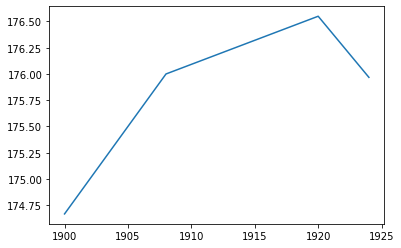

In [19]:
def sport_height_year(sport):
    df_sport = df[df['Sport'] == sport]
    df_sport_height_year = df_sport.groupby('Year').mean()['Height'].reset_index()
    df_sport_height_year
    plt.plot(df_sport_height_year['Year'], df_sport_height_year['Height'])

#deporte = input('Ingrese un deporte: ')
deporte = 'Rugby'
sport_height_year(deporte)


### 5. Implemente una función que solicite al usuario un deporte, y grafique el histograma de peso del deporte seleccionado por año.

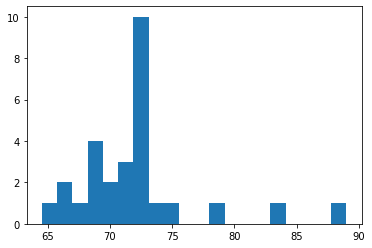

In [45]:
def sport_weight_year(sport):
    df_sport = df[df['Sport'] == sport]
    df_sport_weight_year = df_sport.groupby('Year').mean()['Weight'].reset_index()
    plt.hist(df_sport_weight_year['Weight'], bins=20)

#deporte = input('Ingrese un deporte: ')
deporte = 'Swimming'
sport_weight_year(deporte)


### 6. Implemente una función que solicite dos deportes, y grafique la evolución de la altura de ambos deportes agrupados por año

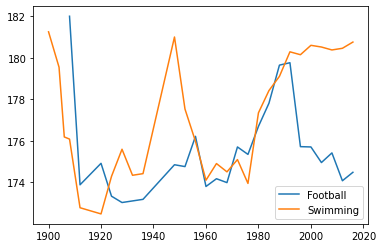

In [44]:
def sport_height_year(sport):
    df_sport = df[df['Sport'] == sport]
    df_sport_height_year = df_sport.groupby('Year').mean()['Height'].reset_index()
    df_sport_height_year
    plt.plot(df_sport_height_year['Year'], df_sport_height_year['Height'], label = sport)
    plt.legend()

#deporte = input('Ingrese un deporte: ')
deporte_1 = 'Football'
deporte_2 = 'Swimming'
grafica_deporte_1 = sport_height_year(deporte_1)
grafica_deporte_2 = sport_height_year(deporte_2)
